### dependancyによるバイアスを確認したい

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from tqdm import trange
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from data_gen import data_pattern4, data_pattern5, data_pattern6, data_pattern7

In [2]:
def show_result(datagenerator,Classifier,n_iter=1000, n_est=100, bagging=True):
    result=[]
    for i in trange(n_iter):
        data,target=datagenerator(random_state=i)
        clf=Classifier(n_estimators=n_est,random_state=i+2019*i,bootstrap=bagging)
        clf.fit(data,target)
        result.append(clf.feature_importances_)
    result=pd.DataFrame(result)
    sns.violinplot(data=result)
    plt.show()

### null caseでdependancy比較

100%|██████████| 100/100 [00:05<00:00, 19.66it/s]


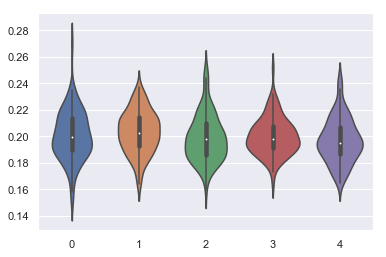

In [3]:
show_result(data_pattern4,RandomForestClassifier,n_iter=100,n_est=50)

100%|██████████| 100/100 [00:05<00:00, 18.97it/s]


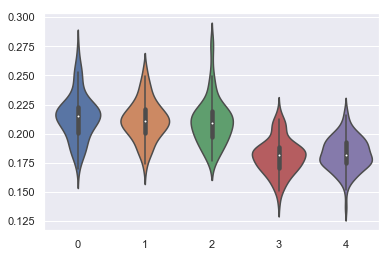

In [4]:
show_result(data_pattern5,RandomForestClassifier,n_iter=100,n_est=50)

### power caseでdependancy比較

100%|██████████| 100/100 [00:05<00:00, 19.49it/s]


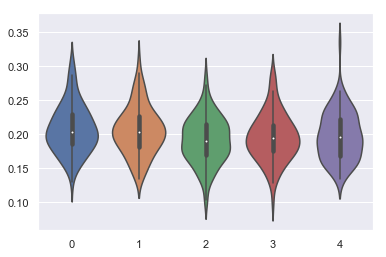

In [5]:
show_result(data_pattern6,RandomForestClassifier,n_iter=100,n_est=50)

100%|██████████| 100/100 [00:05<00:00, 20.77it/s]


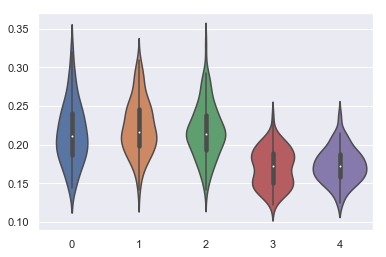

In [6]:
show_result(data_pattern7,RandomForestClassifier,n_iter=100,n_est=50)

### ここ、分散が小さくなると、重要度が等しくなってくる気がする
逆に分散が大きくなると(判別への寄与がいまいちになってくると)、重要度を奪い合う傾向にある気がする。